# Neural Networks image recognition - MultiLayer Perceptron
Use both MLNN for the following problem.

1. Add random noise (see below on `size parameter` on [`np.random.normal`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html)) to the images in training and testing. **Make sure each image gets a different noise feature added to it. Inspect by printing out several images. Note - the `size` parameter should match the data. **
2. Compare the `accuracy` of train and val after N epochs for MLNN with and without noise. 
3. Vary the amount of noise by changing the `scale` parameter in `np.random.normal` by a factor. Use `.1, .5, 1.0, 2.0, 4.0` for the `scale` and keep track of the `accuracy` for training and validation and plot these results.

# `np.random.normal`

## Parameters

### loc

Mean (“centre”) of the distribution.

### scale

Standard deviation (spread or “width”) of the distribution. Must be non-negative.

### size

Output shape. If the given shape is, e.g., (m, n, k), then m * n * k samples are drawn. If size is None (default), a single value is returned if loc and scale are both scalars. Otherwise, np.broadcast(loc, scale).size samples are drawn.

# Neural Networks - Image Recognition 

In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from tensorflow.keras.optimizers import RMSprop
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend
from keras.utils import np_utils

In [2]:
import matplotlib.pyplot as  plt
%matplotlib inline

## Multi Layer Neural Network
Trains a simple deep NN on the MNIST dataset.
Gets to 98.40% test accuracy after 20 epochs
(there is *a lot* of margin for parameter tuning).

In [3]:
# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

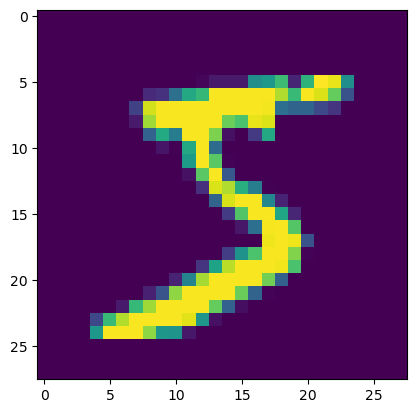

In [5]:
plt.imshow(x_train[0])

In [6]:
from numpy import random

x = random.normal(loc=1, scale=2, size=x_train.shape)
x

array([[[-7.79948913e-01,  1.23368444e+00,  1.18619325e+00, ...,
         -3.09588456e+00,  8.79397186e-01,  2.64386606e+00],
        [ 3.44425596e+00, -1.83854837e+00, -5.60777206e-01, ...,
          1.46620834e+00,  1.60091780e+00, -7.36136277e-01],
        [ 8.50659444e-01,  3.32752908e+00,  1.36297036e+00, ...,
          2.25178274e+00, -1.91876706e+00,  3.81780014e-02],
        ...,
        [ 3.09065951e+00, -1.64374351e+00,  3.30233858e+00, ...,
          1.76345221e+00,  1.41782830e+00, -2.17314706e-02],
        [ 3.62941690e+00, -1.23337906e+00,  3.27944643e+00, ...,
         -2.32842388e-01,  6.95874447e-01,  2.98230483e+00],
        [ 3.62719015e+00, -7.60466677e-01,  7.56155355e-01, ...,
         -2.64474639e-01, -1.19693993e+00, -1.03411808e+00]],

       [[ 4.52232913e+00,  2.98125330e+00,  3.81803779e+00, ...,
          1.64478058e+00, -1.50575204e+00,  2.50094111e+00],
        [-1.12936178e+00,  1.53509023e+00,  9.50449750e-01, ...,
          1.02629395e+00, -8.34944183e

In [7]:
x_train + x

array([[[-7.79948913e-01,  1.23368444e+00,  1.18619325e+00, ...,
         -3.09588456e+00,  8.79397186e-01,  2.64386606e+00],
        [ 3.44425596e+00, -1.83854837e+00, -5.60777206e-01, ...,
          1.46620834e+00,  1.60091780e+00, -7.36136277e-01],
        [ 8.50659444e-01,  3.32752908e+00,  1.36297036e+00, ...,
          2.25178274e+00, -1.91876706e+00,  3.81780014e-02],
        ...,
        [ 3.09065951e+00, -1.64374351e+00,  3.30233858e+00, ...,
          1.76345221e+00,  1.41782830e+00, -2.17314706e-02],
        [ 3.62941690e+00, -1.23337906e+00,  3.27944643e+00, ...,
         -2.32842388e-01,  6.95874447e-01,  2.98230483e+00],
        [ 3.62719015e+00, -7.60466677e-01,  7.56155355e-01, ...,
         -2.64474639e-01, -1.19693993e+00, -1.03411808e+00]],

       [[ 4.52232913e+00,  2.98125330e+00,  3.81803779e+00, ...,
          1.64478058e+00, -1.50575204e+00,  2.50094111e+00],
        [-1.12936178e+00,  1.53509023e+00,  9.50449750e-01, ...,
          1.02629395e+00, -8.34944183e

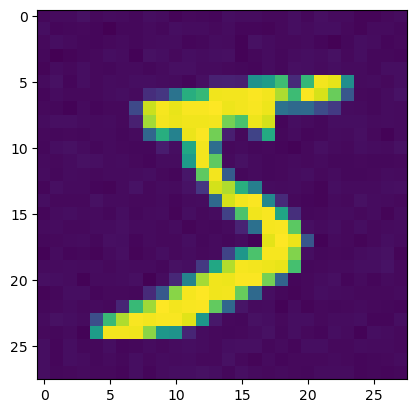

In [8]:
plt.imshow(x_train[0]+x[0])

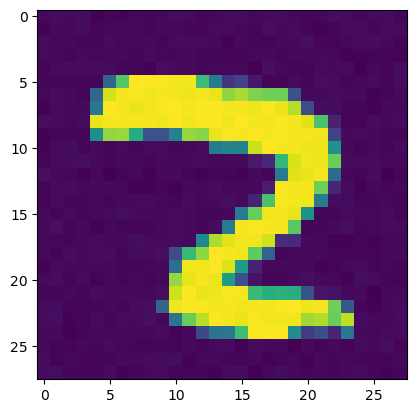

In [9]:
plt.imshow(x_train[28]+x[28])

In [11]:
#reshape the data without noise
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

60000 train samples
10000 test samples


In [12]:
batch_size = 128
num_classes = 10
epochs = 20
scores = []

In [13]:
# convert class vectors to binary class matrices
y_train = keras.utils.np_utils.to_categorical(y_train, num_classes)
y_test = keras.utils.np_utils.to_categorical(y_test, num_classes)

y_train, y_test

(array([[0., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 1., 0.]], dtype=float32),
 array([[0., 0., 0., ..., 1., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32))

In [14]:
# define the model and evaluate without noise
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

2023-04-10 23:43:43.745428: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


2023-04-10 23:43:44.386891: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/20
469/469 [==============================] - 3s 5ms/step - loss: 0.8596 - accuracy: 0.7322 - val_loss: 0.4329 - val_accuracy: 0.8734
Epoch 2/20
469/469 [==============================] - 2s 5ms/step - loss: 0.3720 - accuracy: 0.8886 - val_loss: 0.2905 - val_accuracy: 0.9128
Epoch 3/20
469/469 [==============================] - 2s 5ms/step - loss: 0.2813 - accuracy: 0.9156 - val_loss: 0.2257 - val_accuracy: 0.9317
Epoch 4/20
469/469 [==============================] - 2s 5ms/step - loss: 0.2236 - accuracy: 0.9326 - val_loss: 0.1901 - val_accuracy: 0.9422
Epoch 5/20
469/469 [==============================] - 2s 5ms/step - loss: 0.1831 - accuracy: 0.9440 - val_loss: 0.1587 - val_accuracy: 0.9512
Epoch 6/20
469/469 [==============================] - 2s 5ms/step - loss: 0.1563 - accuracy: 0.9529 - val_loss: 0.1383 - val_accuracy: 0.9574
Epoch 7/20
469/469 [==============================] - 2s 5ms/step - loss: 0.1361 - accuracy: 0.9593 - val_loss: 0.1192 - val_accuracy: 0.9638
Epoch 

In [15]:
# define the model and evaluate without noise and different epochs
epochs = [10, 20, 40, 80]

for epoch in epochs:
    model = Sequential()
    model.add(Dense(512, activation='relu', input_shape=(784,)))
    model.add(Dropout(0.2))
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(10, activation='softmax'))

    model.summary()

    model.compile(loss='categorical_crossentropy',
                  optimizer=RMSprop(),
                  metrics=['accuracy'])

    history = model.fit(x_train, y_train,
                        batch_size=batch_size,
                        epochs=epoch,
                        verbose=1,
                        validation_data=(x_test, y_test))
    score = model.evaluate(x_test, y_test, verbose=0)
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])

    scores.append(score)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
469/469 [==============================] - 3s 5ms/step - loss: 0.8628 - accuracy: 0.7349 - val_loss: 0.

Epoch 16/80
469/469 [==============================] - 2s 5ms/step - loss: 0.0646 - accuracy: 0.9809 - val_loss: 0.0792 - val_accuracy: 0.9782
Epoch 17/80
469/469 [==============================] - 3s 5ms/step - loss: 0.0609 - accuracy: 0.9811 - val_loss: 0.0752 - val_accuracy: 0.9787
Epoch 18/80
469/469 [==============================] - 2s 5ms/step - loss: 0.0578 - accuracy: 0.9815 - val_loss: 0.0770 - val_accuracy: 0.9777
Epoch 19/80
469/469 [==============================] - 3s 5ms/step - loss: 0.0548 - accuracy: 0.9834 - val_loss: 0.0754 - val_accuracy: 0.9778
Epoch 20/80
469/469 [==============================] - 2s 5ms/step - loss: 0.0526 - accuracy: 0.9839 - val_loss: 0.0723 - val_accuracy: 0.9786
Epoch 21/80
469/469 [==============================] - 2s 5ms/step - loss: 0.0499 - accuracy: 0.9848 - val_loss: 0.0743 - val_accuracy: 0.9794
Epoch 22/80
469/469 [==============================] - 3s 5ms/step - loss: 0.0482 - accuracy: 0.9848 - val_loss: 0.0771 - val_accuracy: 0.9790

In [16]:
scores

[[0.09370874613523483, 0.9724000096321106],
 [0.07846753299236298, 0.9789000153541565],
 [0.07780631631612778, 0.9824000000953674],
 [0.11048133671283722, 0.9836000204086304]]

In [17]:
# add different noise scales
scales = [.1, .5, 1.0, 2.0, 4.0]
epochs = [10, 20, 80]
scores_n = []
for epoch in epochs:
    
    # build model and evaluate
    model = Sequential()
    model.add(Dense(512, activation='relu', input_shape=(784,)))
    model.add(Dropout(0.2))
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(10, activation='softmax'))
    model.summary()
    
    model.compile(loss='categorical_crossentropy', optimizer=RMSprop(), metrics=['accuracy'])

    for scale in scales:
        print(epoch)
        print(scale)
        
        x = random.normal(loc=1, scale=scale, size=x_train.shape)
        x_train = x_train + x
        
        x = random.normal(loc=1, scale=scale, size=x_test.shape)
        x_test = x_test + x
        
        history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epoch,
                    verbose=1,
                    validation_data=(x_test, y_test))
        
        score = model.evaluate(x_test, y_test, verbose=0)
        print('Test loss:', score[0])
        print('Test accuracy:', score[1])
        
        scores_n.append(score)

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_10 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_11 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
10
0.1
Epoch 1/10
469/469 [==============================] - 3s 6ms/step - loss: 2.3294 - accuracy: 0.1108 - val_l

Epoch 8/20
469/469 [==============================] - 3s 5ms/step - loss: 2.3000 - accuracy: 0.1137 - val_loss: 2.3011 - val_accuracy: 0.1134
Epoch 9/20
469/469 [==============================] - 3s 6ms/step - loss: 2.2988 - accuracy: 0.1137 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 10/20
469/469 [==============================] - 3s 6ms/step - loss: 2.3010 - accuracy: 0.1140 - val_loss: 2.3012 - val_accuracy: 0.1136
Epoch 11/20
469/469 [==============================] - 3s 6ms/step - loss: 2.3020 - accuracy: 0.1138 - val_loss: 2.3010 - val_accuracy: 0.1136
Epoch 12/20
469/469 [==============================] - 3s 6ms/step - loss: 2.2990 - accuracy: 0.1139 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 13/20
469/469 [==============================] - 3s 6ms/step - loss: 2.3061 - accuracy: 0.1138 - val_loss: 2.3011 - val_accuracy: 0.1136
Epoch 14/20
469/469 [==============================] - 3s 6ms/step - loss: 2.3037 - accuracy: 0.1141 - val_loss: 2.4977 - val_accuracy: 0.1132
E

Epoch 1/80
469/469 [==============================] - 3s 6ms/step - loss: 3.1193 - accuracy: 0.1082 - val_loss: 2.3012 - val_accuracy: 0.1136
Epoch 2/80
469/469 [==============================] - 2s 5ms/step - loss: 2.3063 - accuracy: 0.1119 - val_loss: 2.3012 - val_accuracy: 0.1138
Epoch 3/80
469/469 [==============================] - 3s 6ms/step - loss: 2.3138 - accuracy: 0.1121 - val_loss: 2.3013 - val_accuracy: 0.1136
Epoch 4/80
469/469 [==============================] - 3s 6ms/step - loss: 2.3038 - accuracy: 0.1125 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 5/80
469/469 [==============================] - 3s 6ms/step - loss: 2.3077 - accuracy: 0.1123 - val_loss: 2.3012 - val_accuracy: 0.1134
Epoch 6/80
469/469 [==============================] - 3s 6ms/step - loss: 2.3030 - accuracy: 0.1125 - val_loss: 2.3011 - val_accuracy: 0.1136
Epoch 7/80
469/469 [==============================] - 3s 6ms/step - loss: 2.3024 - accuracy: 0.1125 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 

Epoch 35/80
469/469 [==============================] - 3s 6ms/step - loss: 2.3012 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 36/80
469/469 [==============================] - 3s 6ms/step - loss: 2.3011 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 37/80
469/469 [==============================] - 3s 5ms/step - loss: 2.3011 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 38/80
469/469 [==============================] - 3s 5ms/step - loss: 2.3011 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 39/80
469/469 [==============================] - 3s 6ms/step - loss: 2.3012 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 40/80
469/469 [==============================] - 3s 5ms/step - loss: 2.3011 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 41/80
469/469 [==============================] - 3s 6ms/step - loss: 2.3011 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135

Epoch 12/80
469/469 [==============================] - 2s 5ms/step - loss: 2.3011 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 13/80
469/469 [==============================] - 3s 5ms/step - loss: 2.3011 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 14/80
469/469 [==============================] - 3s 6ms/step - loss: 2.3012 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 15/80
469/469 [==============================] - 3s 5ms/step - loss: 2.3011 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 16/80
469/469 [==============================] - 3s 6ms/step - loss: 2.3012 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 17/80
469/469 [==============================] - 3s 5ms/step - loss: 2.3011 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 18/80
469/469 [==============================] - 3s 6ms/step - loss: 2.3012 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135

Epoch 46/80
469/469 [==============================] - 3s 6ms/step - loss: 2.3011 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 47/80
469/469 [==============================] - 3s 5ms/step - loss: 2.3011 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 48/80
469/469 [==============================] - 3s 6ms/step - loss: 2.3011 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 49/80
469/469 [==============================] - 3s 5ms/step - loss: 2.3011 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 50/80
469/469 [==============================] - 2s 5ms/step - loss: 2.3011 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 51/80
469/469 [==============================] - 3s 6ms/step - loss: 2.3011 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 52/80
469/469 [==============================] - 3s 5ms/step - loss: 2.3011 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135

Epoch 23/80
469/469 [==============================] - 3s 6ms/step - loss: 2.3010 - accuracy: 0.1125 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 24/80
469/469 [==============================] - 3s 5ms/step - loss: 2.3010 - accuracy: 0.1125 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 25/80
469/469 [==============================] - 3s 6ms/step - loss: 2.3011 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 26/80
469/469 [==============================] - 3s 6ms/step - loss: 2.3012 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 27/80
469/469 [==============================] - 3s 6ms/step - loss: 2.3010 - accuracy: 0.1125 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 28/80
469/469 [==============================] - 3s 5ms/step - loss: 2.3010 - accuracy: 0.1125 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 29/80
469/469 [==============================] - 3s 6ms/step - loss: 2.3011 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135

In [26]:
scores, scores_n

([[0.09370874613523483, 0.9724000096321106],
  [0.07846753299236298, 0.9789000153541565],
  [0.07780631631612778, 0.9824000000953674],
  [0.11048133671283722, 0.9836000204086304]],
 [[2.3010480403900146, 0.11349999904632568],
  [2.301054000854492, 0.11349999904632568],
  [2.301016092300415, 0.11349999904632568],
  [2.3010640144348145, 0.11349999904632568],
  [2.301105499267578, 0.11349999904632568],
  [2.301701784133911, 0.11379999667406082],
  [2.301332473754883, 0.11339999735355377],
  [2.301957130432129, 0.11330000311136246],
  [2.3009259700775146, 0.1136000007390976],
  [2.3010573387145996, 0.11349999904632568],
  [2.301002264022827, 0.11349999904632568],
  [2.3010101318359375, 0.11349999904632568],
  [2.301025867462158, 0.11349999904632568],
  [2.3010172843933105, 0.11349999904632568],
  [2.3010172843933105, 0.11349999904632568]])

In [30]:
import numpy as np
import pandas as pd

scoresdf = pd.DataFrame(scores, columns=['loss','accuracy'])
scoresndf = pd.DataFrame(scores_n, columns=['loss','accuracy'])

scoresdf, scoresndf

(       loss  accuracy
 0  0.093709    0.9724
 1  0.078468    0.9789
 2  0.077806    0.9824
 3  0.110481    0.9836,
         loss  accuracy
 0   2.301048    0.1135
 1   2.301054    0.1135
 2   2.301016    0.1135
 3   2.301064    0.1135
 4   2.301105    0.1135
 5   2.301702    0.1138
 6   2.301332    0.1134
 7   2.301957    0.1133
 8   2.300926    0.1136
 9   2.301057    0.1135
 10  2.301002    0.1135
 11  2.301010    0.1135
 12  2.301026    0.1135
 13  2.301017    0.1135
 14  2.301017    0.1135)

Text(0, 0.5, 'Accuracy Scores')

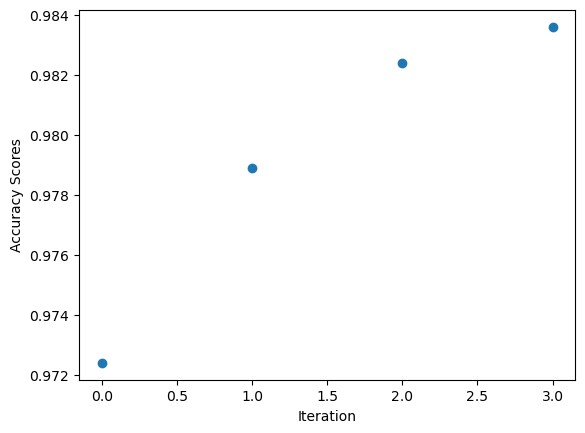

In [39]:
plt.figure()
plt.scatter(scoresdf.index, scoresdf['accuracy'])
plt.xlabel("Iteration")
plt.ylabel("Accuracy Scores")

Text(0, 0.5, 'Accuracy Scores')

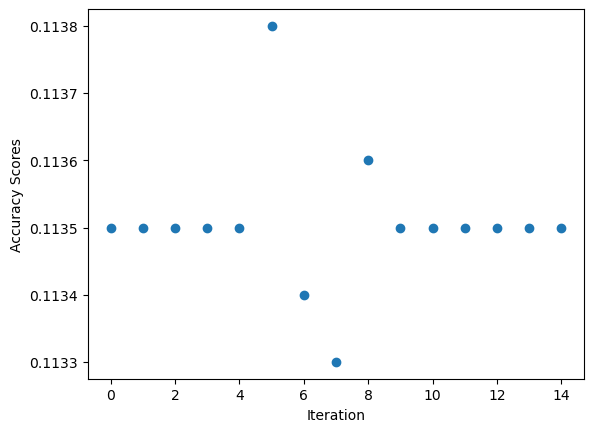

In [40]:
plt.figure()
plt.scatter(scoresndf.index, scoresndf['accuracy'])
plt.xlabel("Iteration")
plt.ylabel("Accuracy Scores")